## **Conceptual Problems**

**1) Classifying binary response variables** The **logistic regression** gives unstable parameter estimates when classes are well-separated. This is because the model assumes that the likelihood of a class for a given observation follows a logistic curve. Because the logistic curve lies **between** 0 and 1, if an instance can be classified as belonging to a given class either 0% or 100% of the time, the probability of a given classification is 0/1, which is outside of the bounds of this framework. This results in the likelihood function (shown below) approximating a probability of 0/1 as  $\pm\infty$.

$$\ell(X|P)=\prod^N_{i=1,y_i=1}P(x_i)\prod^N_{i=1,y_i=0}(1-P(x_i))$$

**Linear discriminant analysis (LDA)** can handle well-separated classes. In the binary case, the LDA estimates class-specific mean values and a common variance, then uses these values to classify an observation according to a Bayesian rule where if $2x(\mu_1-\mu_2) > \mu^2_1-\mu^2_2$, the observation belongs to class 1 and if $2x(\mu_1-\mu_2) < \mu^2_1-\mu^2_2$, the observation belongs to class 2. 


**2) Comparing classifiers** 
* Linear Discriminant Analysis: LDA is a more biased approach than QDA or KNN, but approximately as biased as logistic regression. The bias-variance tradeoff for LDA is fixed (see QDA for alternative). Parametric, assumes the discriminant function
$$\delta_k(x) = x\frac{\mu_k}{\sigma^2}-\frac{\mu_k^2}{2\sigma^2}+\log(\pi_k)$$
<br>
* Quadratic Discriminant Analysis: QDA is a compromise between the flexibility of KNN and the bias of LDA and logistic regression. To increase the flexibility of the model, each class can have a separate covariance estimate. This increases the variance of the model because the number of parameters to be estimated increases from $p(p+1)/2$ to $Kp(p+1)/2$, where $K$ represents the number of classes to be estimated and $p$ represents the number of predictors. Parametric, assumes the quadratic function 
$$\delta_k(x) = -\frac{1}{2}(x-\mu_k)^T\sum_{k}^{-1}(x-\mu_k)-\frac{1}{2}log{|{\sum_{k}}|} + log{\pi_k}$$

<br>
* Logistic regression: Logistic regression has a similar bias to LDA. The bias-variance tradeoff for this model depends on the number of predictor variables included -- as the number of predictors increases, the model becomes more flexible. Parametric, assumes the logistic function  
$$ p(X) = \frac{e^{\beta_0+\beta_1X}}{1+e^{\beta_0+\beta_1X}}$$
<br>
* K-Nearest Neighbors: Non-parametric and the most flexible of classification approaches presented because it makes no assumptions about the functional form of the data. Given a value for $k$ (the number of neighbors considered) and data point $x$, the KNN classifier identifies the $k$ observations neighboring $x$ ($N_0$). Then it calculates the proportion of observations equal to a given class. When the proportion is 0.5, a decision boundary is drawn. This procedure is repeated for all data points in the data set, resulting in a complete decision boundary so that all points are classified as belonging to class A or class B. KNN assumes no function for the decision boundary, but $k$ alters the bias-variance tradeoff and so alters its curvature, with the flexibility of the boundary increasing as $k$ approaches 1 and bias increasing as k approaches $n$.  
    $$P(Y=c \mid X=x) = \frac{1}{K}\sum_{i\in{N_0}}I(y_i = c) $$
   


**3) The curse of dimensionality** The dimensionality of a dataset is the ratio of the number of variables to the number of observations, or p:n. As dimensionality increases, the number of samples allocated to a given variable decrease, and a classifier has less data to represent each class, which results in poor classification accuracy for test data. This is especially a problem for KNN classification because KNN needs to calculate the proportion of data points that belong to a particular class as a way of drawing the decision boundary. As $p$ approaches $n$, the number of neighbors for a given data point decreases, resulting in a low-resolution decision boundary (requiring greater values of $k$ to even estimate a boundary). 

**4) Comparing logistic and KNN classifier performance** A KNN classifier with k=1 is almost certainly overfitting to local data points (even a single stray data point could alter the placement of the decision boundary). So, while the *combined* training and test accuracy is greater for the KNN classification method, the training error is likely to be very low, and the test error high (à la overfitting). With an estimate of 0% training error, the test error is $.18*2=.36$. 
The logistic regression should be used because it has lower test error. 

## **Applied ISLR problems**

**4.10) Analyzing the Weekly dataset **

**a) Exploring the Weekly dataset**

In [2]:
library(ISLR)
library(corrplot)
# ?Weekly

corrplot 0.84 loaded


In [3]:
str(Weekly)
attach(Weekly)
summary(Weekly)

'data.frame':	1089 obs. of  9 variables:
 $ Year     : num  1990 1990 1990 1990 1990 1990 1990 1990 1990 1990 ...
 $ Lag1     : num  0.816 -0.27 -2.576 3.514 0.712 ...
 $ Lag2     : num  1.572 0.816 -0.27 -2.576 3.514 ...
 $ Lag3     : num  -3.936 1.572 0.816 -0.27 -2.576 ...
 $ Lag4     : num  -0.229 -3.936 1.572 0.816 -0.27 ...
 $ Lag5     : num  -3.484 -0.229 -3.936 1.572 0.816 ...
 $ Volume   : num  0.155 0.149 0.16 0.162 0.154 ...
 $ Today    : num  -0.27 -2.576 3.514 0.712 1.178 ...
 $ Direction: Factor w/ 2 levels "Down","Up": 1 1 2 2 2 1 2 2 2 1 ...


      Year           Lag1               Lag2               Lag3         
 Min.   :1990   Min.   :-18.1950   Min.   :-18.1950   Min.   :-18.1950  
 1st Qu.:1995   1st Qu.: -1.1540   1st Qu.: -1.1540   1st Qu.: -1.1580  
 Median :2000   Median :  0.2410   Median :  0.2410   Median :  0.2410  
 Mean   :2000   Mean   :  0.1506   Mean   :  0.1511   Mean   :  0.1472  
 3rd Qu.:2005   3rd Qu.:  1.4050   3rd Qu.:  1.4090   3rd Qu.:  1.4090  
 Max.   :2010   Max.   : 12.0260   Max.   : 12.0260   Max.   : 12.0260  
      Lag4               Lag5              Volume            Today         
 Min.   :-18.1950   Min.   :-18.1950   Min.   :0.08747   Min.   :-18.1950  
 1st Qu.: -1.1580   1st Qu.: -1.1660   1st Qu.:0.33202   1st Qu.: -1.1540  
 Median :  0.2380   Median :  0.2340   Median :1.00268   Median :  0.2410  
 Mean   :  0.1458   Mean   :  0.1399   Mean   :1.57462   Mean   :  0.1499  
 3rd Qu.:  1.4090   3rd Qu.:  1.4050   3rd Qu.:2.05373   3rd Qu.:  1.4050  
 Max.   : 12.0260   Max.   : 12.0

There appears to be a strong correlation between the volume traded and the year that the shares were traded, but not with the return for the previous weeks. 

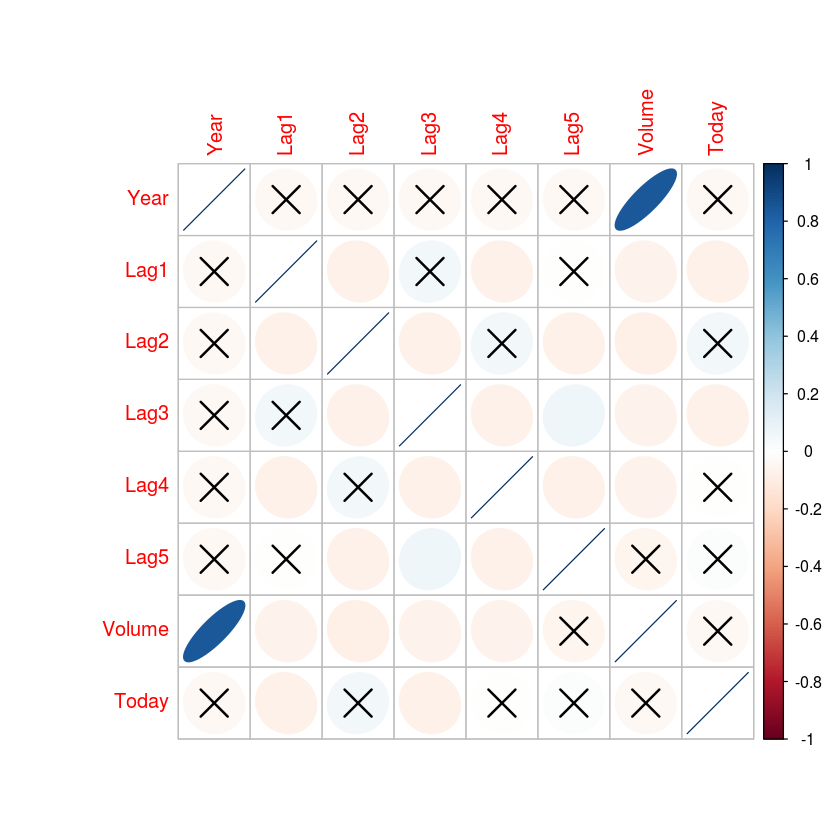

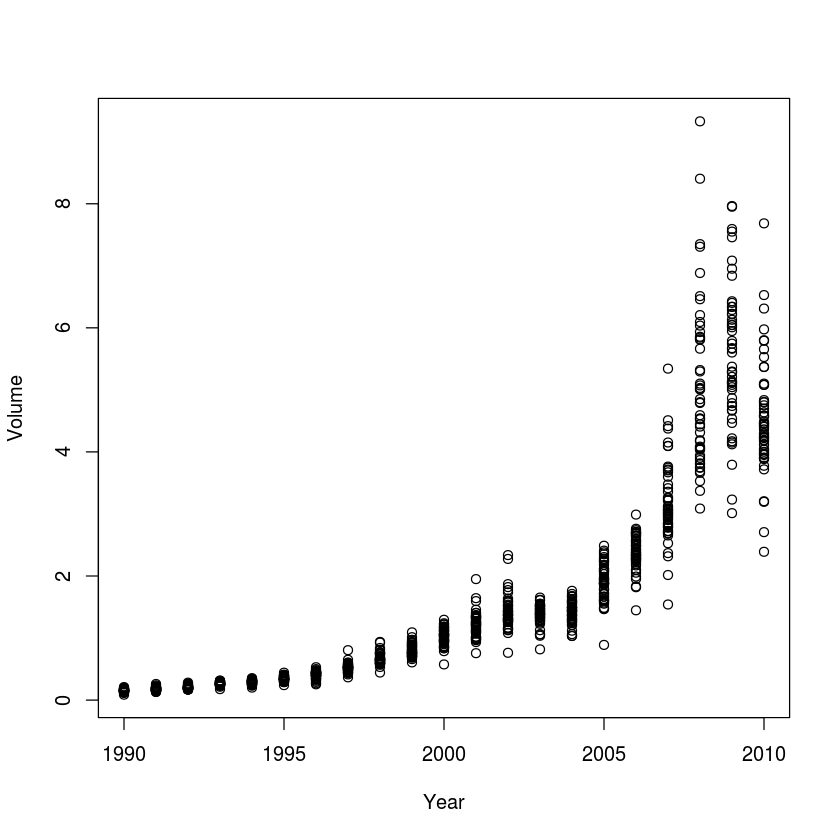

In [3]:
Weekly_corr <- cor(Weekly[,c(1:8)])
corr_vals <- cor.mtest(Weekly[, c(1:8)], conf.level=.99)
corrplot(Weekly_corr, p.mat = corr_vals$p, method='ellipse')
plot(Year,Volume)

**b) Logistic regression**  The Lag2 predictor was significantly different from zero. This means that it was helpful in predicting whether the market return went up or down. The intercept was also significantly different from zero, but is likely not informative because the volume traded will likely not be zero. 

In [4]:
log.fit = glm(Direction~Lag1+Lag2+Lag3+Lag4+Lag5+Volume, family=binomial)
op <- par(mfrow=c(2,2))
# plot(log.fit)

summary(log.fit)


Call:
glm(formula = Direction ~ Lag1 + Lag2 + Lag3 + Lag4 + Lag5 + 
    Volume, family = binomial)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-1.6949  -1.2565   0.9913   1.0849   1.4579  

Coefficients:
            Estimate Std. Error z value Pr(>|z|)   
(Intercept)  0.26686    0.08593   3.106   0.0019 **
Lag1        -0.04127    0.02641  -1.563   0.1181   
Lag2         0.05844    0.02686   2.175   0.0296 * 
Lag3        -0.01606    0.02666  -0.602   0.5469   
Lag4        -0.02779    0.02646  -1.050   0.2937   
Lag5        -0.01447    0.02638  -0.549   0.5833   
Volume      -0.02274    0.03690  -0.616   0.5377   
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 1496.2  on 1088  degrees of freedom
Residual deviance: 1486.4  on 1082  degrees of freedom
AIC: 1500.4

Number of Fisher Scoring iterations: 4


**c) Logistic regression performance**

,Up
Down,0
Up,1


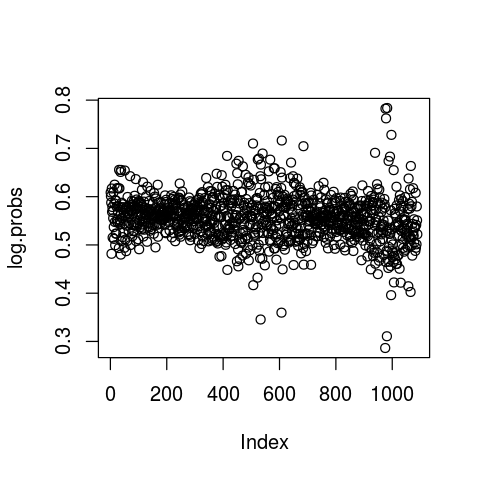

In [5]:
log.probs = predict(log.fit, type = "response")
options(repr.plot.width=4, repr.plot.height=4)
plot(log.probs)
contrasts(Direction)
log.pred=rep("Down",nrow(Weekly))
log.pred[log.probs>.5]="Up"

In [6]:
#prediction accuracy
table(log.pred, Direction)

        Direction
log.pred Down  Up
    Down   54  48
    Up    430 557

The logistic classifier more frequently *misclassifies* the downward percentage return  than the upward return. This might be due to biases in the proportion of up versus down directions in the data set. 

**d) Reduced logistic regression performance**

In [5]:
train = (Year<2009)
test = Weekly[!train,]

sparse_log.fit = glm(Direction~Lag2, subset=train, family=binomial)
op <- par(mfrow=c(2,2))
# plot(sparse_log.fit)

summary(sparse_log.fit)


Call:
glm(formula = Direction ~ Lag2, family = binomial, subset = train)

Deviance Residuals: 
   Min      1Q  Median      3Q     Max  
-1.536  -1.264   1.021   1.091   1.368  

Coefficients:
            Estimate Std. Error z value Pr(>|z|)   
(Intercept)  0.20326    0.06428   3.162  0.00157 **
Lag2         0.05810    0.02870   2.024  0.04298 * 
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 1354.7  on 984  degrees of freedom
Residual deviance: 1350.5  on 983  degrees of freedom
AIC: 1354.5

Number of Fisher Scoring iterations: 4


In [6]:
sparse_log.probs=predict(sparse_log.fit, test, type="response")
sparse_log.pred=rep("Down",nrow(test)) 
sparse_log.pred[sparse_log.probs>0.5]="Up"

table(sparse_log.pred, test$Direction)
mean(sparse_log.pred==test$Direction)

               
sparse_log.pred Down Up
           Down    9  5
           Up     34 56

[1] 0.625

**e) LDA classification**

In [7]:
library(MASS)
(lda.fit = lda(Direction~Lag2, subset=train))
# plot(lda.fit)

Call:
lda(Direction ~ Lag2, subset = train)

Prior probabilities of groups:
     Down        Up 
0.4477157 0.5522843 

Group means:
            Lag2
Down -0.03568254
Up    0.26036581

Coefficients of linear discriminants:
           LD1
Lag2 0.4414162

In [11]:
#lda
lda.pred=predict(lda.fit, test, type="response")
lda.class = lda.pred$class 

table(lda.class, test$Direction)
mean(lda.class==test$Direction)

         
lda.class Down Up
     Down    9  5
     Up     34 56

[1] 0.625

**f) QDA classification**

In [12]:
#qda
(qda.fit = qda(Direction~Lag2, subset=train)
)
qda.pred=predict(qda.fit, test, type="response")
qda.class = qda.pred$class 

table(qda.class, test$Direction)
mean(qda.class==test$Direction)

Call:
qda(Direction ~ Lag2, subset = train)

Prior probabilities of groups:
     Down        Up 
0.4477157 0.5522843 

Group means:
            Lag2
Down -0.03568254
Up    0.26036581

         
qda.class Down Up
     Down    0  0
     Up     43 61

[1] 0.5865385

**e) KNN classification**

In [13]:
#knn
library(class)

train.X = data.frame(cbind(Lag2)[train,])
test.X = data.frame(cbind(Lag2)[!train,])

train.Direction = Direction[train]

set.seed(1)

In [14]:
knn.pred=knn(train.X, test.X, train.Direction, k=1, prob=TRUE)
table(knn.pred,test$Direction)
sum(diag(table(knn.pred, test$Direction)))/nrow(test.X)

        
knn.pred Down Up
    Down   21 30
    Up     22 31

[1] 0.5

**h) Best classification method** The linear discriminant analysis and the logistic regression have the best overall test classification performance of the classification methods we tried. However, they both come with severe biases -- because there's a greater proportion of positive "up" returns than negative "down" returns in the training data, the classification for down returns is poor and the classifiers are biased toward an "up" classification. 

**i) Experimenting with parameters**

[1] 0.5865385

        
knn.pred Down Up
    Down   20 20
    Up     23 41

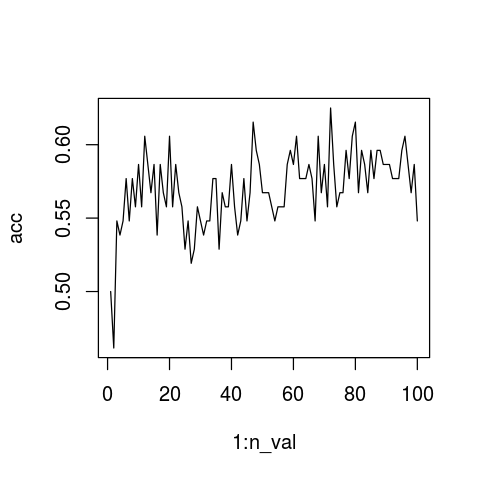

In [15]:
#experimenting with k 
n_val = 100
acc = numeric(length=n_val)
for (kval in 1:n_val) {
    knn.pred=knn(train.X, test.X, train.Direction, k=kval)
    acc[kval] = sum(diag(table(knn.pred, test$Direction)))/nrow(test.X)
}
knn.pred = knn(train.X, test.X, train.Direction, k=15)
acc[15]
table(knn.pred, test$Direction)
plot(x=1:n_val, y=acc, type='l')

In [16]:
#lda 
lda.fit = lda(Direction~Lag1*Lag2*Lag3*Lag4*Lag5*Volume, subset=train)
lda.pred=predict(lda.fit, test, type="response")
lda.class = lda.pred$class 

table(lda.class, test$Direction)
mean(lda.class==test$Direction)

         
lda.class Down Up
     Down   19 23
     Up     24 38

[1] 0.5480769

In [17]:
#qda 
qda.fit = qda(Direction~Lag1*Lag2*Lag3*Lag4*Lag5*Volume, subset=train)
qda.pred=predict(qda.fit, test, type="response")
qda.class = qda.pred$class 

table(qda.class, test$Direction)
mean(qda.class==test$Direction)

         
qda.class Down Up
     Down   15 34
     Up     28 27

[1] 0.4038462

In [36]:
#logistic 
log.fit2 = glm(Direction~Lag1+Volume, subset=train, family=binomial)
summary(log.fit2)
log.fit2 = glm(Direction~Lag1+Lag2+Volume, subset=train, family=binomial)
summary(log.fit2)
log.fit2 = glm(Direction~Lag1+Lag2+Lag3+Volume, subset=train, family=binomial)
summary(log.fit2)
log.fit2 = glm(Direction~Lag1+Lag2+Lag3+Lag4+Volume, subset=train, family=binomial)
summary(log.fit2)
log.fit2 = glm(Direction~Lag1+Lag2+Lag3+Lag4+Lag5+Volume, subset=train, family=binomial)
summary(log.fit2)

log.fit2 = glm(Direction~Lag2*Volume, subset=train, family=binomial)
summary(log.fit2)

test.probs = predict(log.fit2,  test, type = "response")

test.pred=rep("Down",nrow(test))
test.pred[test.probs>.5]="Up"

table(test.pred, test$Direction)

mean(test.pred==test$Direction)


Call:
glm(formula = Direction ~ Lag1 + Volume, family = binomial, subset = train)

Deviance Residuals: 
   Min      1Q  Median      3Q     Max  
-1.458  -1.258   1.012   1.086   1.314  

Coefficients:
            Estimate Std. Error z value Pr(>|z|)    
(Intercept)  0.32025    0.09019   3.551 0.000384 ***
Lag1        -0.06445    0.02903  -2.220 0.026425 *  
Volume      -0.08391    0.05175  -1.621 0.104948    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 1354.7  on 984  degrees of freedom
Residual deviance: 1347.8  on 982  degrees of freedom
AIC: 1353.8

Number of Fisher Scoring iterations: 4



Call:
glm(formula = Direction ~ Lag1 + Lag2 + Volume, family = binomial, 
    subset = train)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-1.4681  -1.2581   0.9929   1.0840   1.5339  

Coefficients:
            Estimate Std. Error z value Pr(>|z|)   
(Intercept)  0.29792    0.09136   3.261  0.00111 **
Lag1        -0.05975    0.02917  -2.048  0.04054 * 
Lag2         0.04774    0.02941   1.624  0.10446   
Volume      -0.07093    0.05263  -1.348  0.17777   
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 1354.7  on 984  degrees of freedom
Residual deviance: 1345.1  on 981  degrees of freedom
AIC: 1353.1

Number of Fisher Scoring iterations: 4



Call:
glm(formula = Direction ~ Lag1 + Lag2 + Lag3 + Volume, family = binomial, 
    subset = train)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-1.4946  -1.2577   0.9906   1.0867   1.4964  

Coefficients:
            Estimate Std. Error z value Pr(>|z|)    
(Intercept)  0.30403    0.09226   3.295 0.000983 ***
Lag1        -0.05911    0.02921  -2.024 0.042997 *  
Lag2         0.04612    0.02956   1.560 0.118703    
Lag3        -0.01412    0.02906  -0.486 0.627026    
Volume      -0.07431    0.05312  -1.399 0.161870    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 1354.7  on 984  degrees of freedom
Residual deviance: 1344.9  on 980  degrees of freedom
AIC: 1354.9

Number of Fisher Scoring iterations: 4



Call:
glm(formula = Direction ~ Lag1 + Lag2 + Lag3 + Lag4 + Volume, 
    family = binomial, subset = train)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-1.5132  -1.2535   0.9891   1.0873   1.4481  

Coefficients:
            Estimate Std. Error z value Pr(>|z|)    
(Intercept)  0.31580    0.09315   3.390 0.000699 ***
Lag1        -0.06097    0.02924  -2.085 0.037052 *  
Lag2         0.04710    0.02960   1.591 0.111559    
Lag3        -0.01701    0.02934  -0.580 0.562114    
Lag4        -0.02741    0.02910  -0.942 0.346261    
Volume      -0.08050    0.05351  -1.505 0.132449    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 1354.7  on 984  degrees of freedom
Residual deviance: 1344.0  on 979  degrees of freedom
AIC: 1356

Number of Fisher Scoring iterations: 4



Call:
glm(formula = Direction ~ Lag1 + Lag2 + Lag3 + Lag4 + Lag5 + 
    Volume, family = binomial, subset = train)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-1.7186  -1.2498   0.9823   1.0841   1.4911  

Coefficients:
            Estimate Std. Error z value Pr(>|z|)    
(Intercept)  0.33258    0.09421   3.530 0.000415 ***
Lag1        -0.06231    0.02935  -2.123 0.033762 *  
Lag2         0.04468    0.02982   1.499 0.134002    
Lag3        -0.01546    0.02948  -0.524 0.599933    
Lag4        -0.03111    0.02924  -1.064 0.287241    
Lag5        -0.03775    0.02924  -1.291 0.196774    
Volume      -0.08972    0.05410  -1.658 0.097240 .  
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 1354.7  on 984  degrees of freedom
Residual deviance: 1342.3  on 978  degrees of freedom
AIC: 1356.3

Number of Fisher Scoring iterations: 4



Call:
glm(formula = Direction ~ Lag2 * Volume, family = binomial, subset = train)

Deviance Residuals: 
   Min      1Q  Median      3Q     Max  
-1.438  -1.263   1.022   1.086   1.521  

Coefficients:
            Estimate Std. Error z value Pr(>|z|)   
(Intercept)  0.27007    0.09024   2.993  0.00277 **
Lag2         0.05036    0.03998   1.260  0.20781   
Volume      -0.05436    0.05279  -1.030  0.30317   
Lag2:Volume  0.00151    0.01328   0.114  0.90945   
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 1354.7  on 984  degrees of freedom
Residual deviance: 1349.4  on 981  degrees of freedom
AIC: 1357.4

Number of Fisher Scoring iterations: 4


         
test.pred Down Up
     Down   20 25
     Up     23 36

[1] 0.5384615

**4.11) Modeling the Auto data set**

**a) Binarizing mpg**

In [23]:
library(ISLR)
library(ggplot2)
library(tidyverse)

# ?Auto
str(Auto)
attach(Auto,warn.conflicts = 0)

Loading tidyverse: tibble
Loading tidyverse: tidyr
Loading tidyverse: readr
Loading tidyverse: purrr
Loading tidyverse: dplyr
Conflicts with tidy packages ---------------------------------------------------
filter(): dplyr, stats
lag():    dplyr, stats
select(): dplyr, MASS


'data.frame':	392 obs. of  9 variables:
 $ mpg         : num  18 15 18 16 17 15 14 14 14 15 ...
 $ cylinders   : num  8 8 8 8 8 8 8 8 8 8 ...
 $ displacement: num  307 350 318 304 302 429 454 440 455 390 ...
 $ horsepower  : num  130 165 150 150 140 198 220 215 225 190 ...
 $ weight      : num  3504 3693 3436 3433 3449 ...
 $ acceleration: num  12 11.5 11 12 10.5 10 9 8.5 10 8.5 ...
 $ year        : num  70 70 70 70 70 70 70 70 70 70 ...
 $ origin      : num  1 1 1 1 1 1 1 1 1 1 ...
 $ name        : Factor w/ 304 levels "amc ambassador brougham",..: 49 36 231 14 161 141 54 223 241 2 ...


In [24]:
logicals <- which(sapply(Auto, is.logical))
factors <- which(sapply(Auto, is.factor))
logicals_factors <- c(logicals,factors)

In [25]:
mpg01 <- mpg > median(mpg)
Auto$mpg01 <- mpg01

**b) Exploring the Auto data set** Below, it appears that mpg01 and cylinders, displacement, horsepower, and weight are strongly negatively associated.

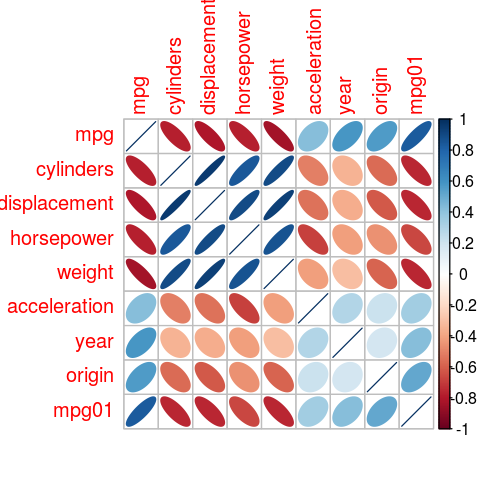

In [26]:
Auto_corr <- cor(Auto[,-factors])
corr_vals <- cor.mtest(Auto[, -factors], conf.level=.99)
corrplot(Auto_corr, p.mat = corr_vals$p, method='ellipse')

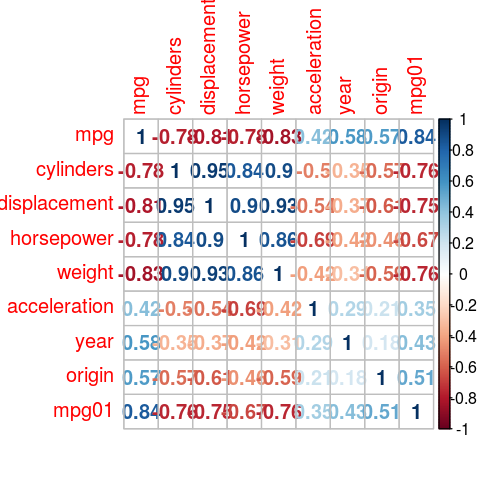

In [27]:
corrplot(Auto_corr, p.mat = corr_vals$p, method='number')

**c) Assigning test and training indices**

In [28]:
set.seed(040218)
total_samples <- nrow(Auto)
train_prop <- .75
training_n_samples <- train_prop*total_samples
train_idx <- sample(total_samples, training_n_samples, replace = 0)
training_samples <- Auto[train_idx,]
test_samples <- Auto[-train_idx,]
head(training_samples); head(test_samples)

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin,name,mpg01
81,22.0,4,122.0,86,2395,16.0,72,1,ford pinto (sw),FALSE
269,27.2,4,119.0,97,2300,14.7,78,3,datsun 510,TRUE
181,25.0,4,121.0,115,2671,13.5,75,2,saab 99le,TRUE
85,27.0,4,97.0,88,2100,16.5,72,3,toyota corolla 1600 (sw),TRUE
59,25.0,4,97.5,80,2126,17.0,72,1,dodge colt hardtop,TRUE
135,16.0,6,258.0,110,3632,18.0,74,1,amc matador,FALSE


,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin,name,mpg01
4,16,8,304,150,3433,12.0,70,1,amc rebel sst,FALSE
5,17,8,302,140,3449,10.5,70,1,ford torino,FALSE
19,27,4,97,88,2130,14.5,70,3,datsun pl510,TRUE
20,26,4,97,46,1835,20.5,70,2,volkswagen 1131 deluxe sedan,TRUE
22,24,4,107,90,2430,14.5,70,2,audi 100 ls,TRUE
24,26,4,121,113,2234,12.5,70,2,bmw 2002,TRUE


**d) LDA classification**

In [29]:
lda.fit <- lda(mpg01~cylinders+displacement+horsepower+weight,subset=train_idx)
lda.pred <- predict(lda.fit, test_samples)
lda.class <- lda.pred$class

table(lda.class, test_samples$mpg01, dnn = c('actual', 'classified'))

#overall accuracy
lda.class_acc <- mean(lda.class==test_samples$mpg01)
#overall error 
lda.class_err <- 1 - lda.class_acc

paste0('lda classification test accuracy: ', round(lda.class_acc,2))
paste0('lda classification test error: ', round(lda.class_err,2))


       classified
actual  FALSE TRUE
  FALSE    30    1
  TRUE      9   58

[1] "lda classification test accuracy: 0.9"

[1] "lda classification test error: 0.1"

   **e) QDA classification**

In [30]:
qda.fit <- qda(mpg01~cylinders+displacement+horsepower+weight,subset=train_idx)
qda.pred <- predict(qda.fit, test_samples)
qda.class <- qda.pred$class

table(qda.class, test_samples$mpg01, dnn = c('actual', 'classified'))

#overall accuracy
qda.class_acc <- mean(qda.class==test_samples$mpg01)
#overall error 
qda.class_err <- 1 - qda.class_acc

paste0('qda classification test accuracy: ', round(qda.class_acc,2))
paste0('qda classification test error: ', round(qda.class_err,2))


       classified
actual  FALSE TRUE
  FALSE    33    2
  TRUE      6   57

[1] "qda classification test accuracy: 0.92"

[1] "qda classification test error: 0.08"

**f) Logistic classification**

In [31]:
log.fit <- glm(mpg01~cylinders+displacement+horsepower+weight,subset=train_idx, 
               family=binomial)
log.pred <- predict(log.fit, test_samples, type='response')

log.class <- ifelse(log.pred > .5, 1,0)

table(log.class, test_samples$mpg01, dnn = c('actual', 'classified'))

#overall accuracy
log.class_acc <- mean(log.class==test_samples$mpg01)
#overall error 
log.class_err <- 1 - log.class_acc

paste0('log classification test accuracy: ', round(log.class_acc,2))
paste0('log classification test error: ', round(log.class_err,2))


      classified
actual FALSE TRUE
     0    31    3
     1     8   56

[1] "log classification test accuracy: 0.89"

[1] "log classification test error: 0.11"

**g) KNN classification**

In [32]:
library(class)

train.X = cbind(cylinders, displacement, horsepower, weight)[train_idx,]
test.X = cbind(cylinders, displacement, horsepower, weight)[-train_idx,]

train.mpg01 = mpg01[train_idx]


knn.pred =knn(train.X, test.X,
             train.mpg01, k=1)

table(knn.pred, mpg01[-train_idx])

#overall accuracy
knn.class_acc <- mean(knn.pred==mpg01[-train_idx])
#overall error 
knn.class_err <- 1 - knn.class_acc

paste0('knn classification test accuracy: ', round(knn.class_acc,2))
paste0('knn classification test error: ', round(knn.class_err,2))


        
knn.pred FALSE TRUE
   FALSE    32    2
   TRUE      7   57

[1] "knn classification test accuracy: 0.91"

[1] "knn classification test error: 0.09"

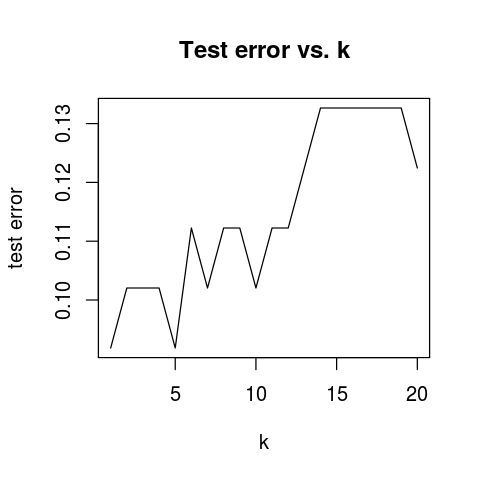

In [33]:
kvals = c(seq(1,20, 1))
acc = rep(0,length=length(kvals))
i=0
for (kval in kvals) {
    i = 1 + i  
    knn.pred=knn(train.X, test.X, train.mpg01, k=kval)
    acc[i] = sum(diag(table(knn.pred, mpg01[-train_idx])))/nrow(test.X)
}
plot(kvals, 1-acc, type='l', xlab='k', ylab='test error', main='Test error vs. k')

Ks of 1 and 5 have equivalent test accuracies of ~ 91%. 

In [34]:
max(acc)
which(acc == max(acc))

[1] 0.9081633

[1] 1 5